# Image Loading and Info 

This notebook contains examples of loading images and displaying information about them.
the used modules are:

- ``PIL``: Python Imaging Library (For loading images)
- ``matplotlib``: Matplotlib (for displaying images)
- ``numpy``: Numpy (for processing images' arrays)

## Installing and importing the required modules

In [2]:
import sys

! {sys.executable} -m pip install -q numpy Pillow matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Loading an image

To load an image, we use the `open` function of the ``PIL`` module.

```python
from PIL import Image
Image.open('image.jpg')
```

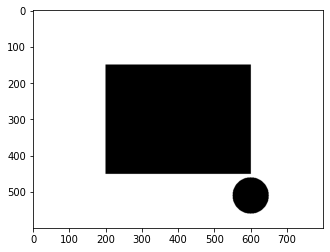

In [4]:
# Load an image
image = Image.open('images/white.png')

# Convert to numpy array
image_array = np.array(image)

# Display the image
plt.imshow(image_array,cmap='gray')
plt.show()

## Details of the image

Now, we can get information about the image. The details are:

- `dimension`: how many dimensions the image has
- `shape`: the shape of the image (number of rows, number of columns, number of channels)

In [5]:
ndim = image_array.ndim
shape = image_array.shape

print(f'ndim: {ndim}')
print(f'shape: {shape}')

ndim: 2
shape: (600, 800)


## Images as Arrays.

An image can be represented as an array of pixels. An image of width $w$<br>
pixels and height $h$ pixels is equivalent to an array $A$ of size $w × h$ pixels.<br>
The pixel in position $[x, y]$ has value $A[x, y]$.

### Neighborhoods

<img src="notebook_images/01_01.png">

- The neighborhood of a pixel is the set of pixels in the image that it touches.
- The 4-neighbors of p touch p on the sides (dark pixels)
- The d-neighbors of p touch p on the corners (shaded pixels)
- Note: The pixel p is not a member of its neighborhood.

<img src="notebook_images/01_02.png">

- The 8-neighbors of p touch p on all sides (dark pixels)
- The 8-neighbor set is the union of the 4-neighbor set and the d-neighbor set.
- Pixels outside the image are not in the neighborhood.


### Connectivity

* Two pixels are connected if they are **neighbors** that share a common property that defines a component.<br>
 The property may be color, brightness, range of brightness values, or anything else of interest.
* Pixels may be 4-connected, d-connected, 8-connected and m-connected.
* Pixels p and q are 4-connected if p and q both have the required property and q is in the 4-neighbor set of p.
* Pixels p and q are d-connected if p and q both have the required property and q is in the d-neighbor set of p.


### Connected Components

<img src="notebook_images/01_03.png">

A set $S$ of pixels is a connected component if there is at least one path in
$S$ that joins every pair ${p, q}$ of pixels in $S$, The path must contain only
pixels in $S$.

* $A$, $B$ and $C$ are connected components under 4-connectivity.

* $B$ and $C$ are joined under 8 or m connectivity.

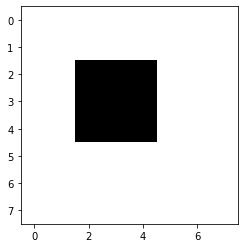

In [16]:
import cv2
img = np.full((8, 8),255, np.uint8)
cv2.rectangle(img, (2,2), (4,4), (0,0,0), -1)
plt.imshow(img,cmap='gray')
plt.show()

In [31]:
result = np.where(img == 0)
points = list(zip(result[0], result[1]))
points = np.array(points)
rows = np.unique(points[:,0])
cols = np.unique(points[:,1])
points 

array([[2, 2],
       [2, 3],
       [2, 4],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 2],
       [4, 3],
       [4, 4]])